## Requeriments

In [1]:
import numpy                 as np
import pandas                as pd
import matplotlib.pyplot     as plt
import seaborn               as sns
import missingno as msno
from zipfile import ZipFile as zf
import random
#import sklearn.metrics       as Metrics

from sklearn.impute import SimpleImputer

/pip_envs/Debuggers3.6/lib/python3.6/site-packages/pandas/compat/__init__.py:120: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


In [2]:
#df = pd.read_csv("/mnt/workstation/data/input_Pesos_Dic_20.csv")#, sep= ",", names =header)
topten = pd.read_csv("/mnt/workstation/data/Input_Topten.csv")
middleten = pd.read_csv("/mnt/workstation/data/Aggregate_20_30.csv")
lastten = pd.read_csv("/mnt/workstation/data/Aggregate_last_10_v2.csv")
labels = pd.read_csv("/mnt/workstation/data/labels.csv")

In [3]:
topten.columns

Index(['id_cli', 'edad', 'mora_max', 'cant_moras_30_ult_12_meses',
       'cant_moras_60_ult_12_meses', 'cant_moras_90_ult_12_meses',
       'cupo_total_tc', 'codigo_ciiu', 'ctas_activas', 'ctas_embargadas',
       'mediana_nom3', 'genero', 'estado_civil', 'nivel_academico',
       'profesion', 'ocupacion', 'tipo_vivienda', 'ciudad_residencia',
       'departamento_residencia', 'ciudad_laboral', 'departamento_laboral',
       'rechazo_credito', 'cat_ingreso', 'rep_calif_cred', 'ind_mora_vigente',
       'cartera_castigada', 'tenencia_tc', 'tiene_consumo', 'tiene_crediagil',
       'tiene_ctas_activas', 'tiene_ctas_embargadas', 'pension_fopep',
       'tiene_cred_hipo_1', 'tiene_cred_hipo_2'],
      dtype='object')

In [4]:
topten = topten.drop(columns=['departamento_residencia',
                                    'ciudad_laboral',
                                    'departamento_laboral',
                                ], axis=0)

In [5]:
middleten.columns

Index(['Unnamed: 0', 'id_cli', 'cant_mora_30_tdc_ult_3m_sf',
       'cant_mora_30_consum_ult_3m_sf', 'periodo', 'ctas_activas',
       'ctas_embargadas', 'cupo_tc_mdo', 'saldo_prom3_tdc_mdo',
       'mediana_nom3_desv', 'mediana_pen3_desv', 'ingreso_nompen_desv',
       'ingreso_final_desv', 'ingreso_nompen', 'ingreso_final',
       'cuota_de_vivienda', 'cuota_de_consumo', 'cuota_rotativos',
       'cuota_de_sector_solidario', 'cuota_sector_real_comercio'],
      dtype='object')

In [6]:
middleten = middleten.drop(columns=['periodo',
                                    'ctas_activas',
                                    'ctas_embargadas',
                                    'saldo_prom3_tdc_mdo',
                                    'cupo_tc_mdo'
                                    ], axis=0)

In [7]:
lastten.columns

Index(['Unnamed: 0', 'id_cli', 'pol_centr_ext', 'saldo_prom3_tdc_mdo',
       'cupo_tc_mdo', 'cant_oblig_tot_sf', 'cant_cast_ult_12m_sr',
       'saldo_no_rot_mdo', 'ind', 'gasto_familiar'],
      dtype='object')

In [8]:
middleten

,Unnamed: 0,id_cli,cant_mora_30_tdc_ult_3m_sf,cant_mora_30_consum_ult_3m_sf,mediana_nom3_desv,mediana_pen3_desv,ingreso_nompen_desv,ingreso_final_desv,ingreso_nompen,ingreso_final,cuota_de_vivienda,cuota_de_consumo,cuota_rotativos,cuota_de_sector_solidario,cuota_sector_real_comercio
0,0,3.0,0.0,0.0,2.892489e+06,0.0,2.987923e+06,1.532311e+06,2.273680e+06,4.270399e+06,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000e+00
1,1,8.0,0.0,0.0,8.123916e+05,0.0,8.592419e+05,1.414450e+06,3.572734e+06,6.810229e+06,0.000000,0.000000e+00,0.000000,0.000000e+00,9.197720e+06
2,2,12.0,0.0,0.0,0.000000e+00,0.0,0.000000e+00,1.092409e+06,0.000000e+00,2.212665e+06,161179.125225,1.022077e+06,0.000000,0.000000e+00,0.000000e+00
3,3,15.0,1.0,0.0,2.563899e+05,0.0,2.733090e+05,7.266392e+04,1.419205e+06,1.406381e+06,0.000000,1.935976e+05,0.000000,0.000000e+00,5.383252e+04
4,4,17.0,0.0,0.0,0.000000e+00,0.0,0.000000e+00,1.271414e+06,0.000000e+00,2.057130e+06,0.000000,9.375573e+05,266128.268392,0.000000e+00,0.000000e+00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1047950,1047950,8704791.0,0.0,5.0,0.000000e+00,0.0,0.000000e+00,1.248232e+06,0.000000e+00,4.991596e+06,0.000000,6.089886e+05,76804.200861,1.838441e+06,1.911084e+05
1047951,1047951,8704792.0,0.0,0.0,0.000000e+00,0.0,0.000000e+00,6.013518e+06,0.000000e+00,1.251312e+07,0.000000,8.499655e+06,529951.413958,0.000000e+00,0.000000e+00
1047952,1047952,8704795.0,0.0,0.0,0.000000e+00,0.0,0.000000e+00,6.521410e+05,0.000000e+00,1.798047e+06,0.000000,4.304050e+05,0.000000,0.000000e+00,3.140159e+05
1047953,1047953,8704799.0,0.0,0.0,2.467045e+06,0.0,2.473568e+06,2.803823e+06,1.042459e+06,9.013815e+06,0.000000,2.254278e+05,38230.035983,0.000000e+00,0.000000e+00


In [9]:
topten.shape

(1047955, 31)

In [10]:
df_Xcli = topten.merge(middleten.iloc[:,1:], on="id_cli", how='left')
df_Xcli.shape

(1047955, 44)

In [11]:
df_Xcli = df_Xcli.merge(lastten.iloc[:,1:], on="id_cli", how='left')
df_Xcli.shape

(1047955, 52)

In [12]:
df_Xcli['mora_max'] = df_Xcli['mora_max'].replace(np.nan,0)
df_Xcli['cant_moras_30_ult_12_meses'] = df_Xcli['cant_moras_30_ult_12_meses'].replace(np.nan,0)
df_Xcli['cant_moras_60_ult_12_meses'] = df_Xcli['cant_moras_60_ult_12_meses'].replace(np.nan,0)
df_Xcli['cant_moras_90_ult_12_meses'] = df_Xcli['cant_moras_90_ult_12_meses'].replace(np.nan,0)

In [13]:
features = pd.DataFrame(df_Xcli.dtypes)
features.columns = ['type']
features_f = features[features['type'] == 'float64'].index
features_o = features[features['type'] == 'object'].index
features_i = features[features['type'] == 'int64'].index
features_b = features[features['type'] == 'bool'].index

In [14]:
for i in features_b:
    df_Xcli[i] = df_Xcli[i].astype('int')

In [15]:
features = pd.DataFrame(df_Xcli.dtypes)
features.columns = ['type']
features_f = features[features['type'] == 'float64'].index
features_o = features[features['type'] == 'object'].index
features_i = features[features['type'] == 'int64'].index
features_b = features[features['type'] == 'bool'].index

In [16]:
df_Xcli[features_o].describe(include='all').T

,count,unique,top,freq
genero,1047955,2,M,530231
estado_civil,949251,5,SOLTERO,482243
nivel_academico,733161,6,UNIVERSITARIO,376528
profesion,746409,79,OTROS,296090
ocupacion,1044763,10,Empleado,661615
tipo_vivienda,491729,3,FAMILIAR,238118
ciudad_residencia,1047380,1434,BOGOTA D.C.,266005
rechazo_credito,3057,4,RECHAZO BIZAGI,2781
cat_ingreso,401892,3,NOM,337884
rep_calif_cred,953420,8,A,220173


In [17]:
df_Xcli[features_f].describe().T

,count,mean,std,min,25%,50%,75%,max
id_cli,1047955.0,3.400356e+06,2.464904e+06,3.000000e+00,1.375613e+06,2.901195e+06,4.956733e+06,8.704800e+06
edad,1047955.0,4.198367e+01,1.377550e+01,1.900000e+01,3.100000e+01,3.900000e+01,5.100000e+01,1.200000e+02
mora_max,1047955.0,7.858711e+00,3.053172e+01,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,3.367000e+03
cant_moras_30_ult_12_meses,1047955.0,1.380059e-01,8.179124e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.200000e+01
cant_moras_60_ult_12_meses,1047955.0,7.258136e-02,6.332952e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.200000e+01
cant_moras_90_ult_12_meses,1047955.0,4.812516e-02,5.237258e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.200000e+01
cupo_total_tc,1047955.0,4.281256e+06,1.007153e+07,0.000000e+00,0.000000e+00,0.000000e+00,4.614967e+06,5.451097e+08
codigo_ciiu,1047955.0,9.111176e+02,2.315126e+03,0.000000e+00,1.000000e+01,1.000000e+01,1.000000e+01,9.900000e+03
ctas_activas,1047954.0,1.049415e+00,4.020435e-01,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.200000e+01
ctas_embargadas,1047954.0,3.114641e-03,5.917691e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,8.000000e+00


Text(199.0, 0.5, 'rows')

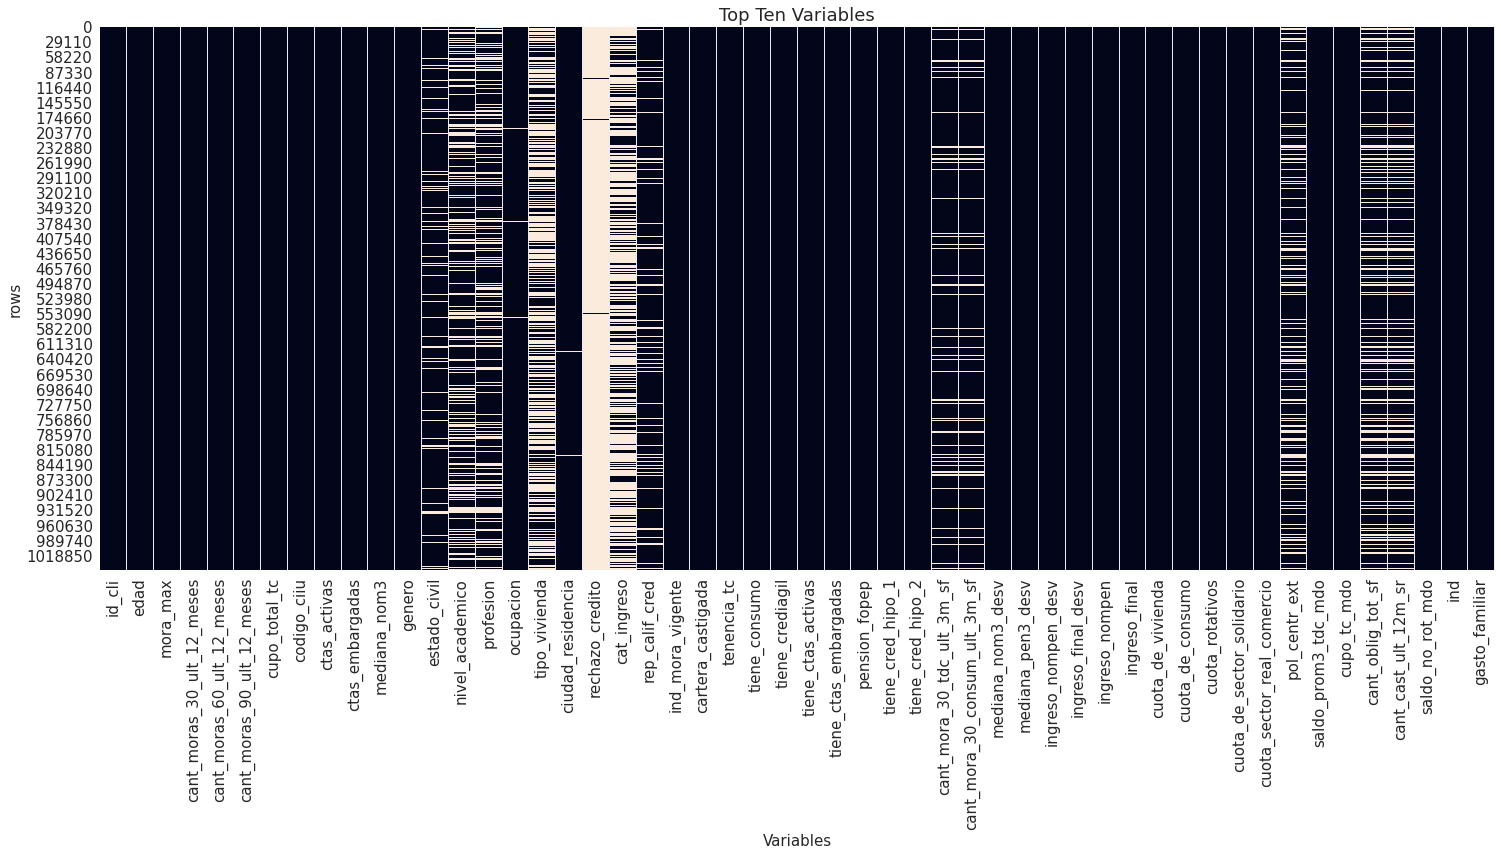

In [18]:
sns.set_style('darkgrid')
plt.rcParams.update({'font.size':15})
plt.figure(figsize=(25,10))
sns.heatmap(df_Xcli.isnull(), cbar=False)
plt.title("Top Ten Variables")
plt.xlabel('Variables')
plt.ylabel('rows')

In [19]:
Nulos = 100*df_Xcli.isnull().sum()/df_Xcli.shape[0]
Nulos = pd.DataFrame(Nulos)
variables_nulas = Nulos[Nulos[0]>30]
variables_nulas

,0
nivel_academico,30.038885
tipo_vivienda,53.077279
rechazo_credito,99.708289
cat_ingreso,61.649880


In [20]:
df_Xcli = df_Xcli.drop(list(variables_nulas.index), axis=1)
df_Xcli.shape

(1047955, 48)

In [21]:
Nulos = 100*df_Xcli.isnull().sum()/df_Xcli.shape[0]
Nulos

id_cli                            0.000000
edad                              0.000000
mora_max                          0.000000
cant_moras_30_ult_12_meses        0.000000
cant_moras_60_ult_12_meses        0.000000
cant_moras_90_ult_12_meses        0.000000
cupo_total_tc                     0.000000
codigo_ciiu                       0.000000
ctas_activas                      0.000095
ctas_embargadas                   0.000095
mediana_nom3                      0.000000
genero                            0.000000
estado_civil                      9.418725
profesion                        28.774709
ocupacion                         0.304593
ciudad_residencia                 0.054869
rep_calif_cred                    9.020903
ind_mora_vigente                  0.000000
cartera_castigada                 0.000000
tenencia_tc                       0.000000
tiene_consumo                     0.000000
tiene_crediagil                   0.000000
tiene_ctas_activas                0.000000
tiene_ctas_

## Missing Values Treatment

In [22]:
Nulos = pd.DataFrame(Nulos)
Nulos.columns = ['%Null']
Variables_Completar = Nulos[Nulos['%Null']>0]
Variables_Completar

,%Null
ctas_activas,0.000095
ctas_embargadas,0.000095
estado_civil,9.418725
profesion,28.774709
ocupacion,0.304593
ciudad_residencia,0.054869
rep_calif_cred,9.020903
cant_mora_30_tdc_ult_3m_sf,9.114323
cant_mora_30_consum_ult_3m_sf,9.114323
mediana_nom3_desv,0.161839


In [23]:
df_Xcli[Variables_Completar.index]

,ctas_activas,ctas_embargadas,estado_civil,profesion,ocupacion,ciudad_residencia,rep_calif_cred,cant_mora_30_tdc_ult_3m_sf,cant_mora_30_consum_ult_3m_sf,mediana_nom3_desv,...,ingreso_final_desv,ingreso_final,pol_centr_ext,saldo_prom3_tdc_mdo,cupo_tc_mdo,cant_oblig_tot_sf,cant_cast_ult_12m_sr,saldo_no_rot_mdo,ind,gasto_familiar
0,1.0,0.0,DIVORCIADO,TECNOLOGIA SISTEMAS,Empleado,CALI,C,0.0,0.0,481996.739440,...,1.008436e+05,1.244439e+06,0.0,0.000000e+00,0.000000e+00,0.0,0.0,9.878612e+05,5.619513e+05,1.792900e+05
1,1.0,0.0,UNION LIBRE,VETERINARIA,Independiente,GARZON,D,0.0,0.0,0.000000,...,2.263888e+06,6.297243e+06,0.0,4.286254e+05,4.286254e+05,3.0,0.0,7.296131e+05,3.367786e+06,1.570146e+06
2,1.0,0.0,UNION LIBRE,NaN,Independiente,PALMIRA,NaN,NaN,NaN,0.000000,...,5.674718e+05,3.265615e+06,NaN,0.000000e+00,0.000000e+00,NaN,NaN,0.000000e+00,1.784371e+06,4.818113e+05
3,1.0,0.0,SOLTERO,OTROS,Empleado,BOGOTA D.C.,D,0.0,0.0,0.000000,...,2.426446e+06,5.638513e+06,0.0,1.388290e+06,3.007127e+06,8.0,0.0,5.116462e+06,-2.987449e+06,9.242045e+05
4,1.0,0.0,SOLTERO,DISEÑO Y PUBLICIDAD,Independiente,BOGOTA D.C.,NaN,0.0,0.0,0.000000,...,1.000554e+06,1.326788e+06,0.0,0.000000e+00,0.000000e+00,1.0,0.0,7.089265e+05,6.778628e+05,2.162112e+05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1047950,1.0,0.0,UNION LIBRE,NaN,Comerciante,BOGOTA D.C.,NaN,0.0,0.0,0.000000,...,5.481943e+05,3.604066e+06,0.0,5.822078e+04,9.736924e+06,2.0,0.0,0.000000e+00,1.733536e+06,3.207775e+05
1047951,1.0,0.0,SOLTERO,NaN,Independiente,BOGOTA D.C.,C,0.0,3.0,745144.950418,...,7.664217e+05,2.039754e+06,NaN,0.000000e+00,0.000000e+00,NaN,NaN,1.835454e+07,-1.201849e+07,1.575005e+05
1047952,1.0,0.0,DIVORCIADO,NaN,Empleado,BOGOTA D.C.,D,0.0,0.0,0.000000,...,2.406212e+06,2.466293e+06,0.0,0.000000e+00,0.000000e+00,1.0,0.0,6.270296e+05,1.981081e+06,7.649322e+05
1047953,1.0,0.0,UNION LIBRE,NaN,Empleado,APARTADO,H,0.0,0.0,246876.688223,...,1.591441e+05,2.182528e+06,0.0,0.000000e+00,7.517818e+06,2.0,0.0,2.940265e+04,1.189505e+06,1.156982e+05


In [24]:
features = pd.DataFrame(df_Xcli[Variables_Completar.index].dtypes)
features.columns = ['type']
features_f = features[features['type'] == 'float64'].index
features_o = features[features['type'] == 'object'].index
features_i = features[features['type'] == 'int64'].index
features_b = features[features['type'] == 'bool'].index

## Categorical Variables

In [25]:
100*df_Xcli[features_o].isnull().sum()/df_Xcli.shape[0]

estado_civil          9.418725
profesion            28.774709
ocupacion             0.304593
ciudad_residencia     0.054869
rep_calif_cred        9.020903
dtype: float64

In [26]:
imp = SimpleImputer(strategy="most_frequent")
imp.fit(df_Xcli[features_o])
imputed_cat_training = imp.transform(df_Xcli[features_o])
imputed_cat_training

array([['DIVORCIADO', 'TECNOLOGIA SISTEMAS', 'Empleado', 'CALI', 'C'],
       ['UNION LIBRE', 'VETERINARIA', 'Independiente', 'GARZON', 'D'],
       ['UNION LIBRE', 'OTROS', 'Independiente', 'PALMIRA', 'A'],
       ...,
       ['DIVORCIADO', 'OTROS', 'Empleado', 'BOGOTA D.C.', 'D'],
       ['UNION LIBRE', 'OTROS', 'Empleado', 'APARTADO', 'H'],
       ['DIVORCIADO', 'DERECHO', 'Independiente', 'BOGOTA D.C.', 'F']],
      dtype=object)

In [27]:
df_Xcli[features_o] = imputed_cat_training

In [28]:
100*df_Xcli[features_o].isnull().sum()/df_Xcli.shape[0]

estado_civil         0.0
profesion            0.0
ocupacion            0.0
ciudad_residencia    0.0
rep_calif_cred       0.0
dtype: float64

In [29]:
df_Xcli[features_o].describe(include='all').T

,count,unique,top,freq
estado_civil,1047955,5,SOLTERO,580947
profesion,1047955,79,OTROS,597636
ocupacion,1047955,10,Empleado,664807
ciudad_residencia,1047955,1434,BOGOTA D.C.,266580
rep_calif_cred,1047955,8,A,314708


## Numerical variables

In [30]:
100*df_Xcli[features_f].isnull().sum()/df_Xcli.shape[0]

ctas_activas                      0.000095
ctas_embargadas                   0.000095
cant_mora_30_tdc_ult_3m_sf        9.114323
cant_mora_30_consum_ult_3m_sf     9.114323
mediana_nom3_desv                 0.161839
mediana_pen3_desv                 0.161839
ingreso_nompen_desv               0.161839
ingreso_final_desv                0.168042
ingreso_final                     0.007729
pol_centr_ext                    22.575588
saldo_prom3_tdc_mdo               0.161839
cupo_tc_mdo                       0.161839
cant_oblig_tot_sf                23.674681
cant_cast_ult_12m_sr             23.674681
saldo_no_rot_mdo                  0.161839
ind                               0.161839
gasto_familiar                    0.161839
dtype: float64

In [31]:
means = df_Xcli[features_f].mean(axis=0)
#means.reset_index(inplce = True)
#means.columns = ['Variable','Mean']
means

ctas_activas                     1.049415e+00
ctas_embargadas                  3.114641e-03
cant_mora_30_tdc_ult_3m_sf       8.991633e-02
cant_mora_30_consum_ult_3m_sf    2.096938e-01
mediana_nom3_desv                4.712045e+05
mediana_pen3_desv                1.512951e+04
ingreso_nompen_desv              4.910243e+05
ingreso_final_desv               1.452007e+06
ingreso_final                    4.935805e+06
pol_centr_ext                    6.995525e-01
saldo_prom3_tdc_mdo              1.928937e+06
cupo_tc_mdo                      7.618836e+06
cant_oblig_tot_sf                3.432582e+00
cant_cast_ult_12m_sr             3.667040e-02
saldo_no_rot_mdo                 8.131012e+06
ind                              1.306124e+06
gasto_familiar                   8.378711e+05
dtype: float64

In [32]:
for i in features_f:
    df_Xcli[i] = df_Xcli[i].fillna(means[i])

In [33]:
df_Xcli[['mediana_pen3_desv','mediana_nom3_desv','cant_mora_30_consum_ult_3m_sf']]

,mediana_pen3_desv,mediana_nom3_desv,cant_mora_30_consum_ult_3m_sf
0,0.0,481996.739440,0.000000
1,0.0,0.000000,0.000000
2,0.0,0.000000,0.209694
3,0.0,0.000000,0.000000
4,0.0,0.000000,0.000000
...,...,...,...
1047950,0.0,0.000000,0.000000
1047951,0.0,745144.950418,3.000000
1047952,0.0,0.000000,0.000000
1047953,0.0,246876.688223,0.000000


In [34]:
ind = df_Xcli[i].isnull().index
df_Xcli.loc[ind,i]

0          1.792900e+05
1          1.570146e+06
2          4.818113e+05
3          9.242045e+05
4          2.162112e+05
               ...     
1047950    3.207775e+05
1047951    1.575005e+05
1047952    7.649322e+05
1047953    1.156982e+05
1047954    9.205334e+05
Name: gasto_familiar, Length: 1047955, dtype: float64

In [35]:
100*df_Xcli[features_f].isnull().sum()/df_Xcli.shape[0]

ctas_activas                     0.0
ctas_embargadas                  0.0
cant_mora_30_tdc_ult_3m_sf       0.0
cant_mora_30_consum_ult_3m_sf    0.0
mediana_nom3_desv                0.0
mediana_pen3_desv                0.0
ingreso_nompen_desv              0.0
ingreso_final_desv               0.0
ingreso_final                    0.0
pol_centr_ext                    0.0
saldo_prom3_tdc_mdo              0.0
cupo_tc_mdo                      0.0
cant_oblig_tot_sf                0.0
cant_cast_ult_12m_sr             0.0
saldo_no_rot_mdo                 0.0
ind                              0.0
gasto_familiar                   0.0
dtype: float64

In [36]:
df_Xcli[features_f].describe().T

,count,mean,std,min,25%,50%,75%,max
ctas_activas,1047955.0,1.049415e+00,4.020433e-01,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.200000e+01
ctas_embargadas,1047955.0,3.114641e-03,5.917688e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,8.000000e+00
cant_mora_30_tdc_ult_3m_sf,1047955.0,8.991633e-02,3.629865e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.100000e+01
cant_mora_30_consum_ult_3m_sf,1047955.0,2.096938e-01,9.932098e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.440000e+02
mediana_nom3_desv,1047955.0,4.712045e+05,1.151860e+06,0.000000e+00,0.000000e+00,0.000000e+00,6.077779e+05,1.540409e+08
mediana_pen3_desv,1047955.0,1.512951e+04,2.753703e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.886119e+08
ingreso_nompen_desv,1047955.0,4.910243e+05,1.196285e+06,0.000000e+00,0.000000e+00,2.456944e+04,6.323311e+05,1.908578e+08
ingreso_final_desv,1047955.0,1.452007e+06,4.564603e+06,1.489323e+01,3.257863e+05,7.289499e+05,1.495374e+06,1.430676e+09
ingreso_final,1047955.0,4.935805e+06,1.285405e+07,9.340157e+04,1.824708e+06,2.899168e+06,4.976416e+06,3.193947e+09
pol_centr_ext,1047955.0,6.995525e-01,1.888085e+00,0.000000e+00,0.000000e+00,0.000000e+00,6.995525e-01,2.200000e+01


In [37]:
df_Xcli[['mediana_pen3_desv','mediana_nom3_desv','cant_mora_30_consum_ult_3m_sf']]

,mediana_pen3_desv,mediana_nom3_desv,cant_mora_30_consum_ult_3m_sf
0,0.0,481996.739440,0.000000
1,0.0,0.000000,0.000000
2,0.0,0.000000,0.209694
3,0.0,0.000000,0.000000
4,0.0,0.000000,0.000000
...,...,...,...
1047950,0.0,0.000000,0.000000
1047951,0.0,745144.950418,3.000000
1047952,0.0,0.000000,0.000000
1047953,0.0,246876.688223,0.000000


## Labeling

In [38]:
labels

,Categoria,Particip,Variable,Label,Var_mean
0,CASADO,9.678370e+05,estado_civil,5,gasto_familiar
1,UNION LIBRE,8.678049e+05,estado_civil,4,gasto_familiar
2,DIVORCIADO,7.881397e+05,estado_civil,3,gasto_familiar
3,VIUDO,6.969590e+05,estado_civil,2,gasto_familiar
4,SOLTERO,6.912766e+05,estado_civil,1,gasto_familiar
...,...,...,...,...,...
9109,D,1.101550e+06,rep_calif_cred,5,ingreso_nompen
9110,F,1.099701e+06,rep_calif_cred,4,ingreso_nompen
9111,G,1.099355e+06,rep_calif_cred,3,ingreso_nompen
9112,H,1.095841e+06,rep_calif_cred,2,ingreso_nompen


In [39]:
for j in ['ind','gasto_familiar','ingreso_nompen']:
    for i in features_o:
        tag = labels[labels['Var_mean'] ==j]
        tmp = pd.pivot_table(tag[tag['Categoria'].isin(df_Xcli[i].unique())][['Categoria','Label']],
                       values='Label',
                       columns='Categoria').round()
        tmp = tmp.T.to_dict()['Label']
        nueva_variable = i+'_tag_'+j
        df_Xcli[nueva_variable] = df_Xcli[i].map(tmp)

In [40]:
conditions = [
    (df_Xcli['genero'] == 'M'),
    (df_Xcli['genero'] == 'F')
]
values = [2,1]
df_Xcli['genero_tag'] = np.select(conditions, values)

In [41]:
df_Xcli.columns

Index(['id_cli', 'edad', 'mora_max', 'cant_moras_30_ult_12_meses',
       'cant_moras_60_ult_12_meses', 'cant_moras_90_ult_12_meses',
       'cupo_total_tc', 'codigo_ciiu', 'ctas_activas', 'ctas_embargadas',
       'mediana_nom3', 'genero', 'estado_civil', 'profesion', 'ocupacion',
       'ciudad_residencia', 'rep_calif_cred', 'ind_mora_vigente',
       'cartera_castigada', 'tenencia_tc', 'tiene_consumo', 'tiene_crediagil',
       'tiene_ctas_activas', 'tiene_ctas_embargadas', 'pension_fopep',
       'tiene_cred_hipo_1', 'tiene_cred_hipo_2', 'cant_mora_30_tdc_ult_3m_sf',
       'cant_mora_30_consum_ult_3m_sf', 'mediana_nom3_desv',
       'mediana_pen3_desv', 'ingreso_nompen_desv', 'ingreso_final_desv',
       'ingreso_nompen', 'ingreso_final', 'cuota_de_vivienda',
       'cuota_de_consumo', 'cuota_rotativos', 'cuota_de_sector_solidario',
       'cuota_sector_real_comercio', 'pol_centr_ext', 'saldo_prom3_tdc_mdo',
       'cupo_tc_mdo', 'cant_oblig_tot_sf', 'cant_cast_ult_12m_sr',
      

In [42]:
features = pd.DataFrame(df_Xcli.dtypes)
features.columns = ['type']
features_f = features[features['type'] == 'float64'].index
features_o = features[features['type'] == 'object'].index
features_i = features[features['type'] == 'int64'].index
features_b = features[features['type'] == 'bool'].index

In [43]:
df_Xcli.shape

(1047955, 64)

In [44]:
df_Xcli[features_o].describe(include='all').T

,count,unique,top,freq
genero,1047955,2,M,530231
estado_civil,1047955,5,SOLTERO,580947
profesion,1047955,79,OTROS,597636
ocupacion,1047955,10,Empleado,664807
ciudad_residencia,1047955,1434,BOGOTA D.C.,266580
rep_calif_cred,1047955,8,A,314708


In [45]:
df_Xcli.describe().T.head(60)

,count,mean,std,min,25%,50%,75%,max
id_cli,1047955.0,3.400356e+06,2.464904e+06,3.000000e+00,1.375613e+06,2.901195e+06,4.956733e+06,8.704800e+06
edad,1047955.0,4.198367e+01,1.377550e+01,1.900000e+01,3.100000e+01,3.900000e+01,5.100000e+01,1.200000e+02
mora_max,1047955.0,7.858711e+00,3.053172e+01,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,3.367000e+03
cant_moras_30_ult_12_meses,1047955.0,1.380059e-01,8.179124e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.200000e+01
cant_moras_60_ult_12_meses,1047955.0,7.258136e-02,6.332952e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.200000e+01
cant_moras_90_ult_12_meses,1047955.0,4.812516e-02,5.237258e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.200000e+01
cupo_total_tc,1047955.0,4.281256e+06,1.007153e+07,0.000000e+00,0.000000e+00,0.000000e+00,4.614967e+06,5.451097e+08
codigo_ciiu,1047955.0,9.111176e+02,2.315126e+03,0.000000e+00,1.000000e+01,1.000000e+01,1.000000e+01,9.900000e+03
ctas_activas,1047955.0,1.049415e+00,4.020433e-01,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.200000e+01
ctas_embargadas,1047955.0,3.114641e-03,5.917688e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,8.000000e+00


In [46]:
df_Xcli.to_csv("/mnt/workstation/data/dataXid.csv", index=False)